# MSDS 422 - Module 7 Assignment 1
## Yue Yu
github: https://github.com/yy383124955/msds422/tree/main/Week%207

## Data overview

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [2]:
# Import data
number_train = pd.read_csv('train.csv')
number_test = pd.read_csv('test.csv')

In [3]:
X_train = number_train.drop(labels = ["label"],axis = 1) 
y_train = number_train["label"]

## TLU

In [4]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
start=datetime.now()
per_clf.fit(X_train, y_train)
end=datetime.now()
y_pred_rf = per_clf.predict(number_test)
tlu_time = end-start

In [5]:
# Print time
print(tlu_time)

0:00:04.825506


In [6]:
y_pred_rf = pd.Series(y_pred_rf ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_rf],axis = 1)
submission.to_csv("predictions-1.csv",index=False)

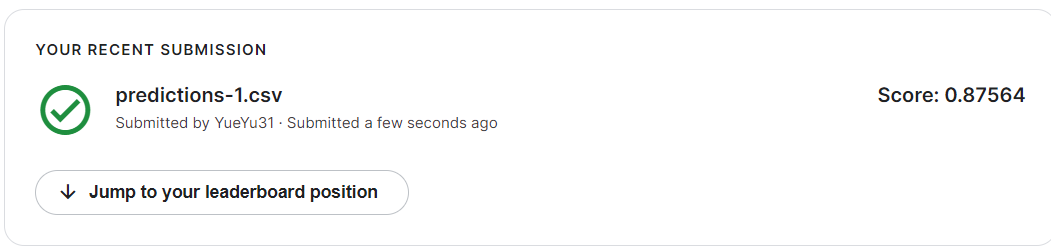

## MLP

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# Scale images to the [0, 1] range
X_train_2 = X_train / 255.0
number_test_2 = number_test / 255.0
# Make sure images have shape (784, 1, 1)
X_train_2 = np.expand_dims(X_train_2, -1)
number_test_2  = np.expand_dims(number_test_2 , -1)

In [8]:
X_train_2.shape

(42000, 784, 1)

In [9]:
num_classes = 10
input_shape = (784, 1)

In [10]:
y_train_2 = keras.utils.to_categorical(y_train, num_classes)
print("x_train shape:", X_train_2.shape)

x_train shape: (42000, 784, 1)


In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 


In [12]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start=datetime.now()
model.fit(X_train_2, y_train_2, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end=datetime.now()
mlp_time = end-start

Epoch 1/15
296/296 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.9073 - val_loss: 0.1700 - val_accuracy: 0.9500
Epoch 2/15
296/296 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.9634 - val_loss: 0.1296 - val_accuracy: 0.9590
Epoch 3/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.1005 - val_accuracy: 0.9676
Epoch 4/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9838 - val_loss: 0.0895 - val_accuracy: 0.9731
Epoch 5/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.9875 - val_loss: 0.0937 - val_accuracy: 0.9712
Epoch 6/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9914 - val_loss: 0.0939 - val_accuracy: 0.9726
Epoch 7/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9939 - val_loss: 0.1019 - val_accuracy: 0.9695
Epoch 

In [13]:
# Print time
print(mlp_time)

0:00:06.614005


In [14]:
number_test_2.shape

(28000, 784, 1)

In [23]:
y_pred_2 =model.predict(number_test_2)

In [25]:
y_pred_2 = np.argmax(y_pred_2,axis = 1)

In [27]:
y_pred_2 = pd.Series(y_pred_2 ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_2],axis = 1)
submission.to_csv("predictions-2.csv",index=False)

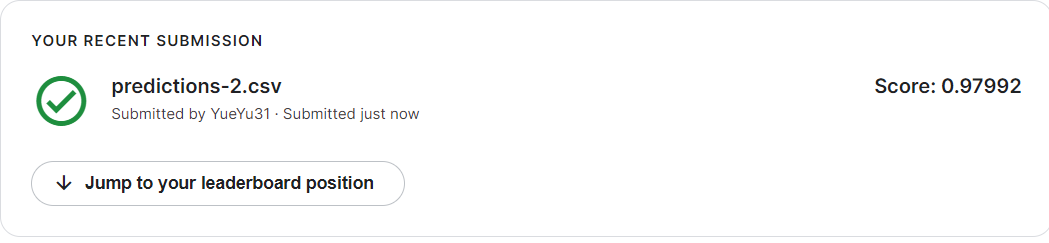

## MLP-2

In [69]:
# Scale images to the [0, 1] range
X_train_3 = X_train / 255.0
number_test_3 = number_test / 255.0
# Make sure images have shape (784, 1, 1)
X_train_3 = np.expand_dims(X_train_3, -1)
number_test_3  = np.expand_dims(number_test_3 , -1)

In [70]:
y_train_3 = keras.utils.to_categorical(y_train, num_classes)
print("x_train shape:", X_train_3.shape)

x_train shape: (42000, 784, 1)


In [71]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, 1]),
    keras.layers.Dense(10, activation="softmax")
]) 

In [72]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start=datetime.now()
model.fit(X_train_3, y_train_3, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end=datetime.now()
mlp_time_2 = end-start

Epoch 1/15
296/296 [==============================] - 0s 854us/step - loss: 0.8257 - accuracy: 0.7974 - val_loss: 0.4677 - val_accuracy: 0.8821
Epoch 2/15
296/296 [==============================] - 0s 657us/step - loss: 0.4120 - accuracy: 0.8905 - val_loss: 0.3697 - val_accuracy: 0.9031
Epoch 3/15
296/296 [==============================] - 0s 658us/step - loss: 0.3491 - accuracy: 0.9050 - val_loss: 0.3340 - val_accuracy: 0.9107
Epoch 4/15
296/296 [==============================] - 0s 644us/step - loss: 0.3205 - accuracy: 0.9120 - val_loss: 0.3144 - val_accuracy: 0.9152
Epoch 5/15
296/296 [==============================] - 0s 647us/step - loss: 0.3027 - accuracy: 0.9151 - val_loss: 0.3077 - val_accuracy: 0.9167
Epoch 6/15
296/296 [==============================] - 0s 643us/step - loss: 0.2910 - accuracy: 0.9192 - val_loss: 0.2946 - val_accuracy: 0.9200
Epoch 7/15
296/296 [==============================] - 0s 658us/step - loss: 0.2822 - accuracy: 0.9216 - val_loss: 0.2880 - val_accuracy:

In [73]:
# Print time
print(mlp_time_2)

0:00:03.154905


In [74]:
y_pred_3 =model.predict(number_test_3)

In [75]:
y_pred_3 = np.argmax(y_pred_3,axis = 1)

In [76]:
y_pred_3 = pd.Series(y_pred_3 ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_3],axis = 1)
submission.to_csv("predictions-3.csv",index=False)

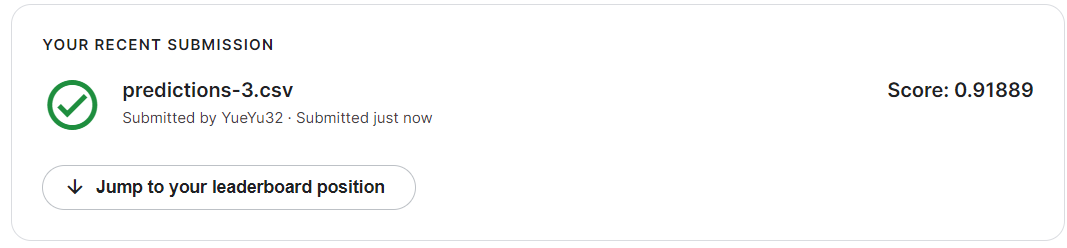

## MLP-3

In [57]:
# Scale images to the [0, 1] range
X_train_4 = X_train / 255.0
number_test_4 = number_test / 255.0
# Make sure images have shape (784, 1, 1, 1, 1)
X_train_4 = np.expand_dims(X_train_4, -1)
X_train_4 = np.expand_dims(X_train_4, -1)
X_train_4 = np.expand_dims(X_train_4, -1)
X_train_4 = np.expand_dims(X_train_4, -1)
number_test_4  = np.expand_dims(number_test_4 , -1)
number_test_4  = np.expand_dims(number_test_4 , -1)
number_test_4  = np.expand_dims(number_test_4 , -1)
number_test_4  = np.expand_dims(number_test_4 , -1)

In [58]:
y_train_4 = keras.utils.to_categorical(y_train, num_classes)
print("x_train shape:", X_train_4.shape)

x_train shape: (42000, 784, 1, 1, 1, 1)


In [59]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, 1,1,1,1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 

In [60]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start=datetime.now()
model.fit(X_train_4, y_train_4, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end=datetime.now()
mlp_time_3 = end-start

Epoch 1/15
296/296 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.9056 - val_loss: 0.1734 - val_accuracy: 0.9498
Epoch 2/15
296/296 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9627 - val_loss: 0.1178 - val_accuracy: 0.9629
Epoch 3/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9760 - val_loss: 0.0965 - val_accuracy: 0.9700
Epoch 4/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9834 - val_loss: 0.1044 - val_accuracy: 0.9681
Epoch 5/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9879 - val_loss: 0.0880 - val_accuracy: 0.9736
Epoch 6/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.0826 - val_accuracy: 0.9750
Epoch 7/15
296/296 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9935 - val_loss: 0.1003 - val_accuracy: 0.9733
Epoch 

In [61]:
# Print time
print(mlp_time_3)

0:00:06.306738


In [62]:
y_pred_4 =model.predict(number_test_4)
y_pred_4 = np.argmax(y_pred_4,axis = 1)
y_pred_4 = pd.Series(y_pred_4 ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_4],axis = 1)
submission.to_csv("predictions-4.csv",index=False)

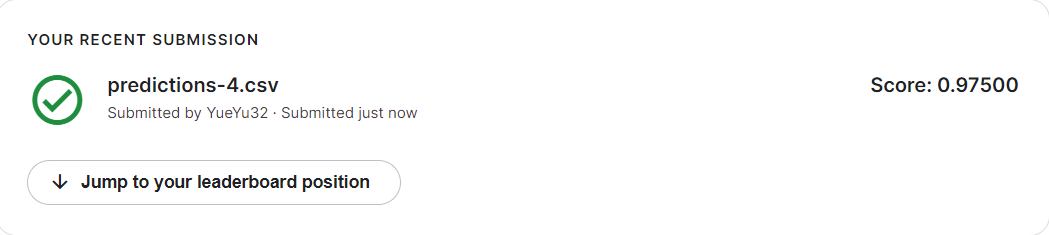

## MLP-4

In [77]:
# Scale images to the [0, 1] range
X_train_5 = X_train / 255.0
number_test_5 = number_test / 255.0
# Make sure images have shape (784, 1, 1, 1, 1)
X_train_5 = np.expand_dims(X_train_5, -1)
X_train_5 = np.expand_dims(X_train_5, -1)
X_train_5 = np.expand_dims(X_train_5, -1)
X_train_5 = np.expand_dims(X_train_5, -1)
number_test_5  = np.expand_dims(number_test_5 , -1)
number_test_5  = np.expand_dims(number_test_5 , -1)
number_test_5  = np.expand_dims(number_test_5 , -1)
number_test_5  = np.expand_dims(number_test_5 , -1)

In [78]:
y_train_5 = keras.utils.to_categorical(y_train, num_classes)
print("x_train shape:", X_train_5.shape)

x_train shape: (42000, 784, 1, 1, 1, 1)


In [81]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, 1,1,1,1]),
    keras.layers.Dense(10, activation="softmax")
]) 

In [82]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start=datetime.now()
model.fit(X_train_5, y_train_5, batch_size=batch_size, epochs=epochs, validation_split=0.1)
end=datetime.now()
mlp_time_4 = end-start

Epoch 1/15
296/296 [==============================] - 0s 856us/step - loss: 0.8165 - accuracy: 0.7998 - val_loss: 0.4666 - val_accuracy: 0.8862
Epoch 2/15
296/296 [==============================] - 0s 655us/step - loss: 0.4105 - accuracy: 0.8915 - val_loss: 0.3703 - val_accuracy: 0.9017
Epoch 3/15
296/296 [==============================] - 0s 648us/step - loss: 0.3492 - accuracy: 0.9049 - val_loss: 0.3359 - val_accuracy: 0.9086
Epoch 4/15
296/296 [==============================] - 0s 644us/step - loss: 0.3200 - accuracy: 0.9115 - val_loss: 0.3149 - val_accuracy: 0.9152
Epoch 5/15
296/296 [==============================] - 0s 661us/step - loss: 0.3032 - accuracy: 0.9159 - val_loss: 0.3036 - val_accuracy: 0.9176
Epoch 6/15
296/296 [==============================] - 0s 660us/step - loss: 0.2907 - accuracy: 0.9189 - val_loss: 0.2946 - val_accuracy: 0.9188
Epoch 7/15
296/296 [==============================] - 0s 650us/step - loss: 0.2818 - accuracy: 0.9213 - val_loss: 0.2910 - val_accuracy:

In [83]:
# Print time
print(mlp_time_4)

0:00:03.163236


In [84]:
y_pred_5 =model.predict(number_test_5)
y_pred_5 = np.argmax(y_pred_5,axis = 1)
y_pred_5 = pd.Series(y_pred_5 ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_5],axis = 1)
submission.to_csv("predictions-5.csv",index=False)

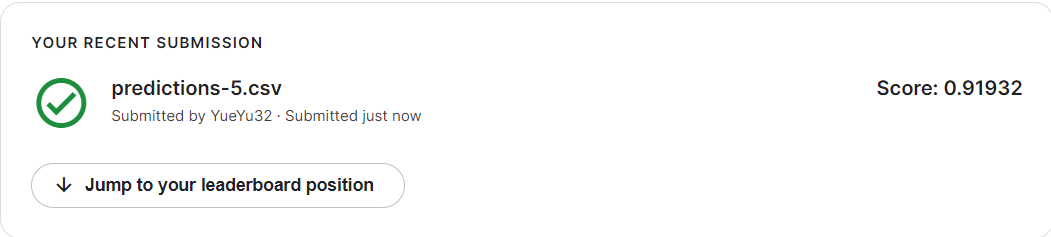

## Conclusion

In [103]:
data = [[4,2,mlp_time,0.9955,0.9799], [2,2,mlp_time_2,0.9300,0.9189], [4,5,mlp_time_3,0.9987,0.9750], [2,5,mlp_time_4,0.9297,0.9193]]

In [104]:
con_df = pd.DataFrame(data, columns = ['Layers', 'Nodes','Time','Training Accuracy','Testing Accuracy'])
con_df

,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,4,2,0 days 00:00:06.614005,0.9955,0.9799
1,2,2,0 days 00:00:03.154905,0.9300,0.9189
2,4,5,0 days 00:00:06.306738,0.9987,0.9750
3,2,5,0 days 00:00:03.163236,0.9297,0.9193


In the beginning, I first used the TLU model, which is a single TLU network model in SKLearn, which can realize part of the perceptron learning algorithm. The accuracy rate in testing is also quite good (0.8756), and the speed is breakneck(0:00:04.825506). TLU is at a disadvantage in both speed and score in the MLP model without hidden Layers.

But when I started testing the MLP model, the powerful neural network model quickly got a score that far exceeded TLU's. I have listed your details in the table above.The Output Layer is the corresponding number classification, so it keeps ten nodes all the time. I change nodes at the input layer to test different MLPS. I also sampled their impact on the predicted results by reducing hidden layers. Through a series of changes, it may be due to the singleness of features, and the multi-dimensional input layers have little influence on the score. More Hidden Layers will improve test scores, but speed will also increase accordingly.